<a href="https://colab.research.google.com/github/Nasrin-Akhtar/IITM_MLT-Machine_Learning_Technique/blob/main/Week_2_programming_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

<ipython-input-6-d015218c744c>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0],X[:,1],c='b',cmap=plt.cm.Spectral)


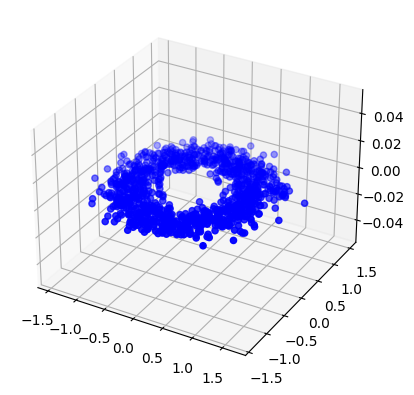

In [6]:
fig= plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],c='b',cmap=plt.cm.Spectral)
plt.show()
# Enter your solution here

## Problem 2
How many samples are there in the dataset?


In [7]:
X.shape# Enter your solution here

(1000, 2)

**There are 1000 samples in the dataset**

## Problem 3
How many features are there in the dataset?

In [8]:
y.shape# Enter your solution here

(1000,)

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [11]:
def rbf_kernal(X,sigma=2.0):
  pairwise_dists= np.sum(X**2,axis=1).reshape(-1,1)+ np.sum(X**2, axis=1)-2*np.dot(X,X.T)
  return np.exp(-pairwise_dists/2*sigma**2)
K=rbf_kernal(X, sigma=2.0)
K# Enter your solution here

array([[1.00000000e+00, 6.15868140e-02, 3.59991376e-04, ...,
        9.81309370e-02, 5.58554333e-01, 1.76131786e-03],
       [6.15868140e-02, 1.00000000e+00, 2.64961754e-01, ...,
        9.21617216e-02, 2.15269600e-02, 2.58496751e-02],
       [3.59991376e-04, 2.64961754e-01, 1.00000000e+00, ...,
        5.15429769e-03, 1.14910444e-04, 1.14832995e-02],
       ...,
       [9.81309370e-02, 9.21617216e-02, 5.15429769e-03, ...,
        1.00000000e+00, 3.00433399e-01, 3.43564017e-01],
       [5.58554333e-01, 2.15269600e-02, 1.14910444e-04, ...,
        3.00433399e-01, 1.00000000e+00, 1.09293114e-02],
       [1.76131786e-03, 2.58496751e-02, 1.14832995e-02, ...,
        3.43564017e-01, 1.09293114e-02, 1.00000000e+00]])

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [13]:
n=K.shape[0]
one_n=np.ones((n,n))/n
K_centered=K-one_n.dot(K)-K.dot(one_n)+ one_n.dot(K).dot(one_n)
K_centered
# Enter your solution here

array([[ 0.79041262, -0.16818271, -0.16709151, ..., -0.12094328,
         0.34729474, -0.21446637],
       [-0.16818271,  0.75004834,  0.07732812, ..., -0.14709463,
        -0.20991477, -0.21056015],
       [-0.16709151,  0.07732812,  0.87468439, ..., -0.17178403,
        -0.1690088 , -0.1626085 ],
       ...,
       [-0.12094328, -0.14709463, -0.17178403, ...,  0.77143895,
         0.07968697,  0.1178495 ],
       [ 0.34729474, -0.20991477, -0.1690088 , ...,  0.07968697,
         0.7870682 , -0.20697058],
       [-0.21446637, -0.21056015, -0.1626085 , ...,  0.1178495 ,
        -0.20697058,  0.77713201]])

## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [14]:
eigvals, eigvecs =np.linalg.eigh(K_centered)
eigvals, eigvecs = eigvals[::-1], eigvecs[:,::-1]
n_components=2
alphas = eigvecs[:, :n_components] / np.sqrt(eigvals[: n_components])
alphas

# Enter your solution here


array([[-0.00221823,  0.0030618 ],
       [-0.00255542, -0.00230023],
       [-0.00055597, -0.00308699],
       ...,
       [ 0.0023144 ,  0.00192528],
       [-0.00028225,  0.00370467],
       [ 0.00370395, -0.00080394]])

#Visualize Transform Data

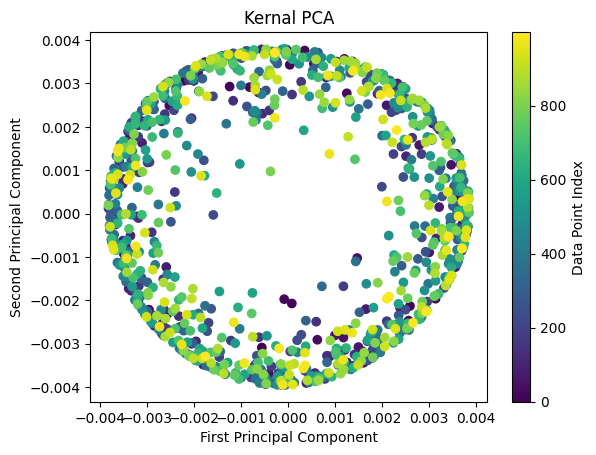

In [15]:
pc1= alphas[:,0]
pc2= alphas[:,1]
plt.scatter(pc1,pc2, c= range(len(pc1)))
plt.title('Kernal PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Data Point Index')
plt.show()